## Python + 머신러닝 예측

- jupyter/pyspark:python3.8.8에서 작성
- 데이터 출처 (캐글 링크 | https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

### EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# label 값 확인
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

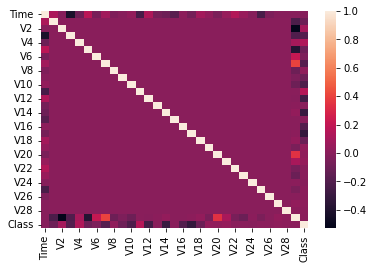

In [7]:
# 공산성이 낮은 데이터
sns.heatmap(df.corr()) 

In [8]:
# label값에 대한 상관관계 확인
df.corr()['Class'].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

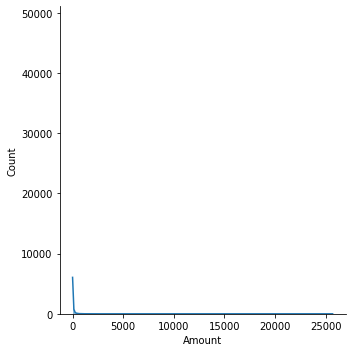

In [9]:
# Amount 정규화 필요 
sns.displot(data=df, x="Amount", kde=True)

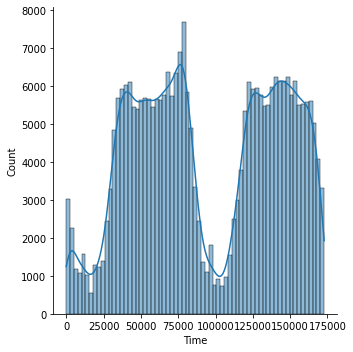

In [10]:
# Time 정규화 필요
sns.displot(data=df, x="Time", kde=True)

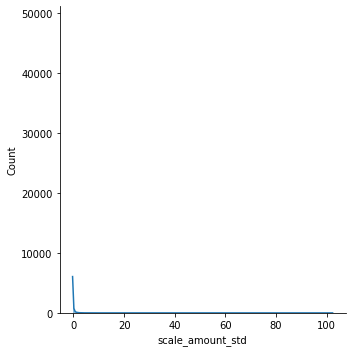

In [11]:
# standard scaler
std_scaler = StandardScaler()
df['scale_amount_std'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
sns.displot(data=df, x="scale_amount_std", kde=True)

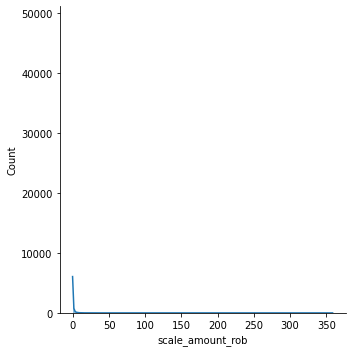

In [12]:
# robust scaler 
rob_scaler = RobustScaler()
df['scale_amount_rob'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
sns.displot(data=df, x="scale_amount_rob", kde=True)

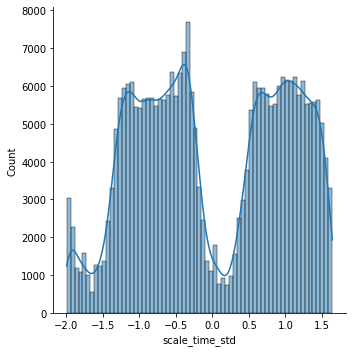

In [13]:
# Time 정규화
df['scale_time_std'] = std_scaler.fit_transform(df['Time'].values.reshape(-1, 1))
sns.displot(data=df, x="scale_time_std", kde=True)

In [14]:
# 안 쓰는 column 없애기 
df = df.drop(['Time', 'Amount', 'scale_amount_std'], axis=1)
scale_amount = df['scale_amount_rob']
scale_time = df['scale_time_std']

In [15]:
df.insert(0, 'scale_amount', scale_amount)
df.insert(1, 'scale_time', scale_time)
df.head()

,scale_amount,scale_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Class,scale_amount_rob,scale_time_std
0,1.783274,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-1.996583
1,-0.269825,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-1.996583
2,4.983721,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-1.996562
3,1.418291,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-1.996562
4,0.670579,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-1.996541


In [16]:
# dateset shuffle
df = df.sample(frac=1)
df.head()

,scale_amount,scale_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Class,scale_amount_rob,scale_time_std
198746,3.884580,0.796372,-0.887797,-0.920315,1.505975,0.054601,-1.032067,0.129266,0.471532,0.137839,...,1.264416,0.741420,-0.032341,-0.928359,-0.327744,0.188775,0.276918,0,3.884580,0.796372
78813,7.621603,-0.781162,0.256881,-2.213319,-0.404803,0.029907,-1.370190,-0.569455,0.499008,-0.365885,...,-0.748515,-0.438046,0.495379,0.135205,1.039412,-0.153069,0.096972,0,7.621603,-0.781162
236461,-0.194508,1.137299,0.086933,0.995813,-0.329656,-0.626455,0.912197,-0.574713,0.909972,0.011656,...,-0.678079,0.107603,0.667010,-0.457987,0.085651,0.218658,0.076398,0,-0.194508,1.137299
47431,1.229651,-1.086670,-0.931375,0.322760,-0.566347,-0.480548,1.687959,3.933089,-0.127386,1.284679,...,0.069802,0.207644,1.069005,-0.131806,0.555943,-0.039851,0.024180,0,1.229651,-1.086670
283565,-0.148536,1.618978,-1.315703,1.308200,1.583054,0.843591,-0.016332,0.665115,0.283373,0.474082,...,-1.266105,-0.187089,-0.490320,0.322367,-0.838622,-0.334881,-0.172232,0,-0.148536,1.618978


In [17]:
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0][:len(fraud_df)]

In [18]:
# undersampling
under_sampled = pd.concat([fraud_df, non_fraud_df])
new_df = under_sampled.sample(frac=1)
new_df.head()

,scale_amount,scale_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Class,scale_amount_rob,scale_time_std
40336,-0.146720,-1.150118,1.213232,0.019081,0.653910,0.890635,-0.624259,-0.566418,-0.118498,-0.119891,...,-0.031426,-0.078818,0.468886,0.565346,0.408529,-0.011420,0.014179,0,-0.146720,-1.150118
233035,-0.056033,1.107692,1.988135,0.116951,-1.605889,0.351343,0.434941,-0.639378,0.160531,-0.149552,...,-0.743011,0.326949,0.691774,-0.293050,0.138258,-0.064288,-0.034246,0,-0.056033,1.107692
52466,-0.293440,-1.039227,-1.476893,2.122314,-1.229470,1.201849,-0.343264,-1.317704,-1.528142,-0.620953,...,-0.040215,-0.238930,0.110144,0.045418,-0.569232,0.481019,-0.047555,1,-0.293440,-1.039227
239214,-0.044435,1.162274,0.143476,0.583583,-0.083261,-0.469798,0.445817,-1.184308,0.932305,-0.183191,...,-0.400134,0.173702,-0.038803,-0.694246,0.163736,0.254425,0.106150,0,-0.044435,1.162274
95534,0.138476,-0.620279,1.193916,-0.571085,0.742522,-0.014588,-0.624561,0.832162,-0.833350,0.272897,...,0.207265,-0.265272,-0.679294,0.511812,1.246604,-0.028671,-0.006112,1,0.138476,-0.620279


오리지널 라벨 분포:
0    0.998273
1    0.001727
Name: Class, dtype: float64
언더 샘플 후 라벨 분포:
0    0.5
1    0.5
Name: Class, dtype: float64


/opt/conda/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

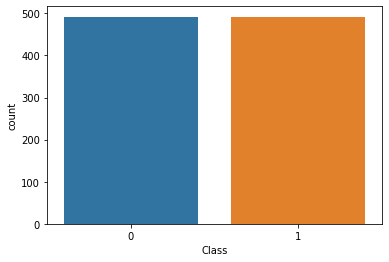

In [19]:
print("오리지널 라벨 분포:")
print(df['Class'].value_counts() / len(df))

print("언더 샘플 후 라벨 분포:")
print(new_df['Class'].value_counts() / len(new_df))

sns.countplot('Class', data=new_df)

<AxesSubplot:>

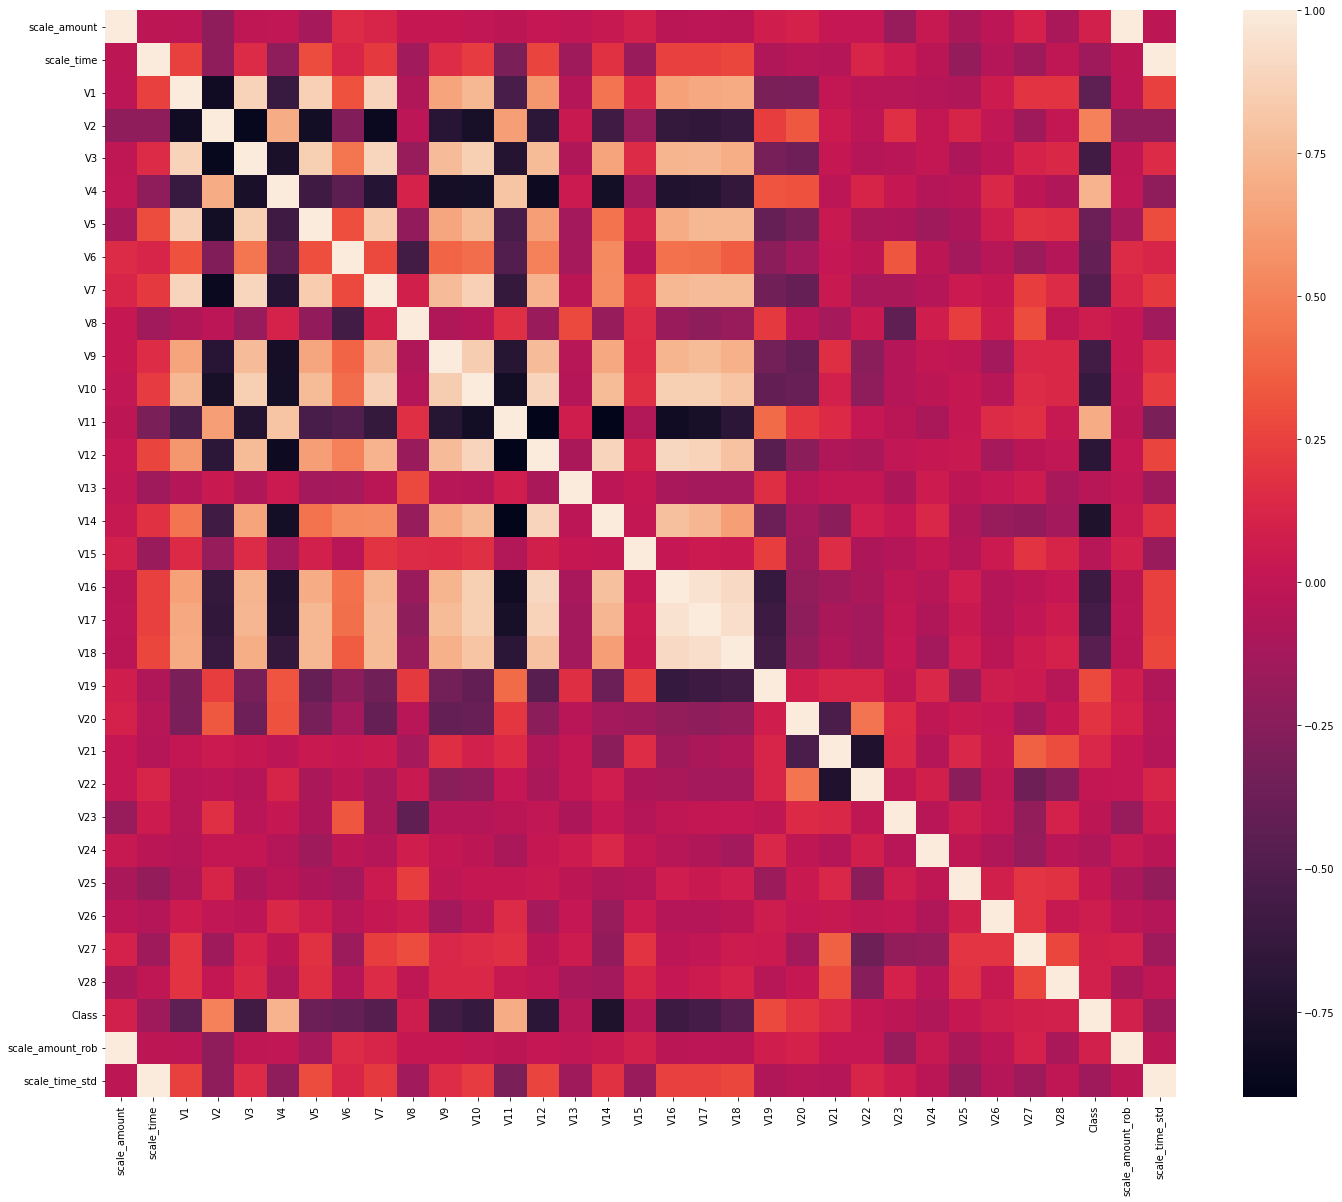

In [20]:
# 상관관계 확인, 이전과 다르게 상관성을 띠는 피쳐들이 생기기 시작.
under_sample_corr = new_df.corr()
f, ax = plt.subplots(1, figsize=(24,20))
sns.heatmap(under_sample_corr, ax=ax)

<AxesSubplot:>

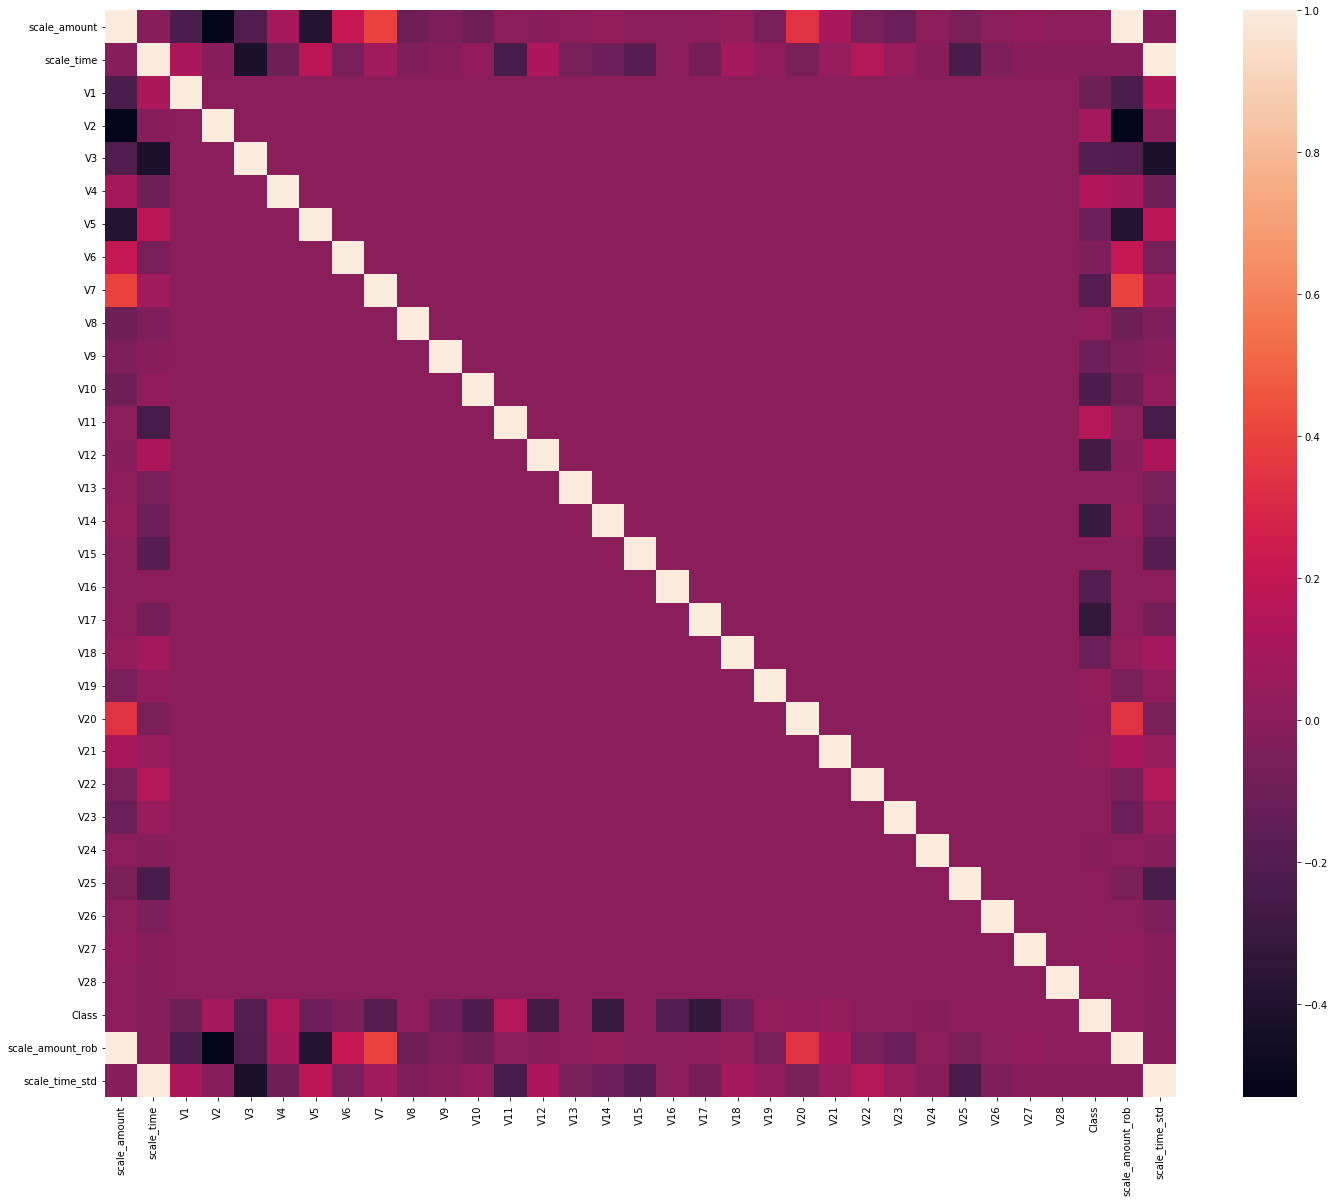

In [21]:
# 비교
before_corr = df.corr()
f, ax = plt.subplots(1, figsize=(24,20))
sns.heatmap(before_corr, ax=ax)

In [22]:
# class와 가장 상관 관계가 높은 4개 feature 확인
top_4_corr = abs(under_sample_corr['Class']).sort_values(ascending=False)[1:5]

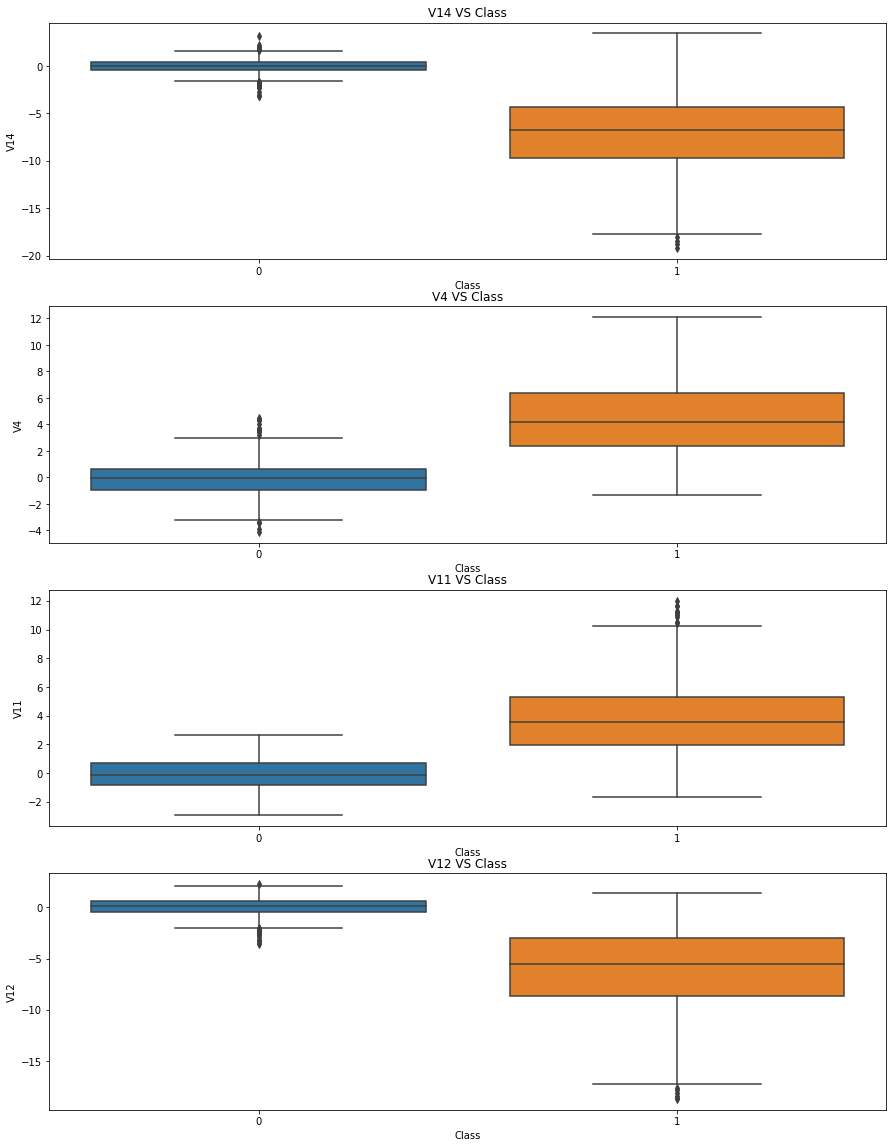

In [23]:
f, ax = plt.subplots(4, figsize=(15, 20))

for i, col in enumerate(top_4_corr.index):
    sns.boxplot(x="Class", y=col, data=new_df, ax=ax[i])
    ax[i].set_title(f"{col} VS Class")
    
plt.show()

In [24]:
# outlier들이 존재. outlier들을 제거
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25 = np.percentile(v14_fraud, 25)
q75 = np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25
v14_cutoff = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cutoff, q75 + v14_cutoff
print('q25: {}, q75: {}'.format(q25, q75))
print('v14_iqr: {}'.format(v14_iqr))
print('v14_cutoff: {}'.format(v14_cutoff))
print('v14_lower: {} v14_upper: {}'.format(v14_lower, v14_upper))

q25: -9.692722964972386, q75: -4.282820849486865
v14_iqr: 5.409902115485521
v14_cutoff: 8.114853173228282
v14_lower: -17.807576138200666 v14_upper: 3.8320323237414167


In [25]:
# outliers
outliers = [i for i in v14_fraud if i < v14_lower or i > v14_upper]
outliers

[-18.8220867423816, -18.0499976898594, -19.2143254902614, -18.4937733551053]

In [26]:
new_df[(new_df['V14']> v14_upper) | (new_df['V14'] < v14_lower)].index

Int64Index([8615, 9252, 8296, 9035], dtype='int64')

In [27]:
# v14 outlier 제거
new_df = new_df.drop(new_df[(new_df['V14']> v14_upper) | (new_df['V14'] < v14_lower)].index)

In [28]:
# v11 outlier 제거
v11_fraud = new_df['V11'].loc[new_df['Class'] == 1].values
q25 = np.percentile(v11_fraud, 25)
q75 = np.percentile(v11_fraud, 75)

v11_iqr = q75 - q25

v11_cutoff = v11_iqr * 1.5

v11_lower, v11_upper = q25 - v11_cutoff, q75 + v11_cutoff

new_df = new_df.drop(new_df[(new_df['V11']> v11_upper) | (new_df['V11'] < v11_lower)].index)

In [29]:
# v12 outlier 제거
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25 = np.percentile(v12_fraud, 25)
q75 = np.percentile(v12_fraud, 75)

v12_iqr = q75 - q25

v12_cutoff = v12_iqr * 1.5

v12_lower, v12_upper = q25 - v12_cutoff, q75 + v12_cutoff

new_df = new_df.drop(new_df[(new_df['V12']> v12_upper) | (new_df['V12'] < v12_lower)].index)

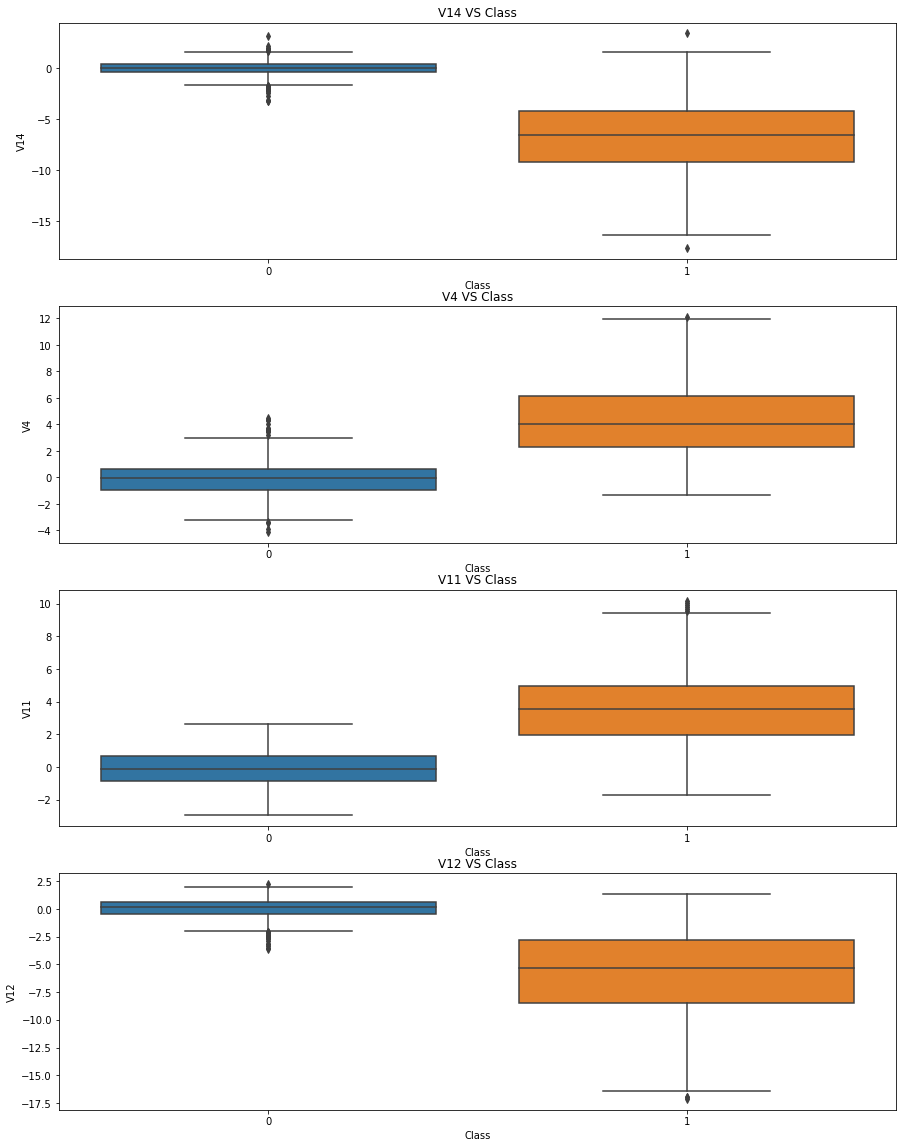

In [30]:
# outlier 제거 후 시각화
f, ax = plt.subplots(4, figsize=(15, 20))

for i, col in enumerate(top_4_corr.index):
    sns.boxplot(x="Class", y=col, data=new_df, ax=ax[i])
    ax[i].set_title(f"{col} VS Class")
    
plt.show()

In [31]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [32]:
x_reduced_tsne = TSNE(n_components=2).fit_transform(X.values)

/opt/conda/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [33]:
tsne_df = new_df.copy()
tsne_df['tsne_1'] = x_reduced_tsne[:,0]
tsne_df['tsne_2'] = x_reduced_tsne[:,1]

In [34]:
# TSNE value 확인
tsne_df.corr()['tsne_2'].sort_values()[:10]

V14      -0.545031
tsne_1   -0.436242
V12      -0.363767
V6       -0.275328
V16      -0.212727
V10      -0.209848
V9       -0.189780
V24      -0.163188
V17      -0.147153
V3       -0.124907
Name: tsne_2, dtype: float64

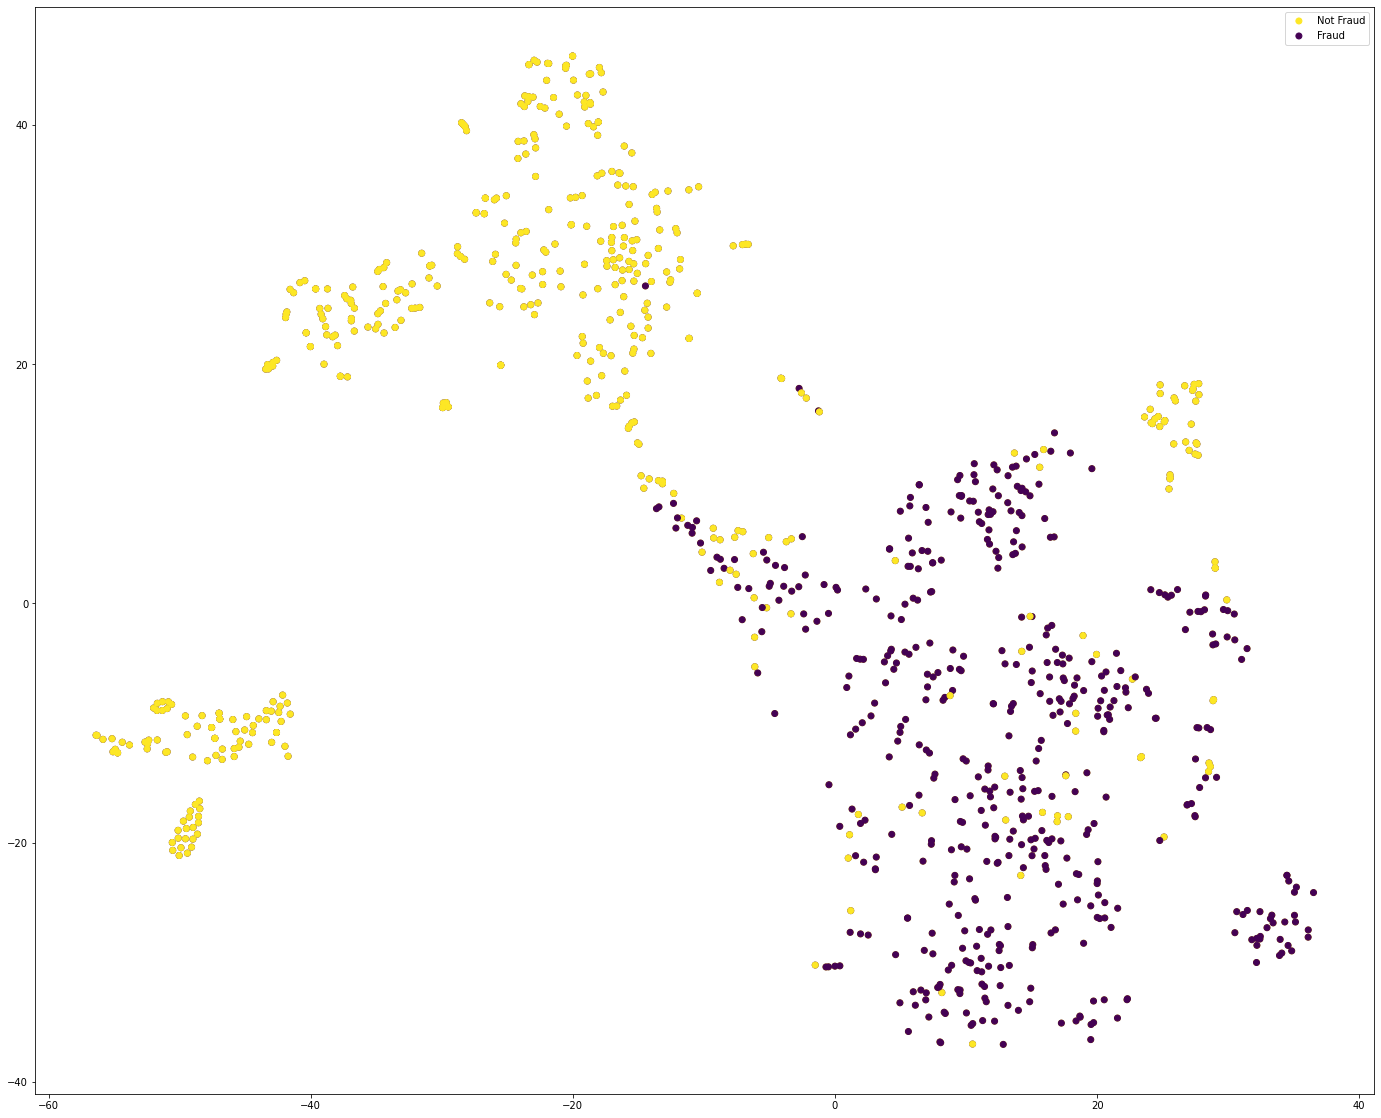

In [35]:
# TSNE 시각화 
f, ax = plt.subplots(1, figsize=(24,20))

ax.scatter(x_reduced_tsne[:,0], x_reduced_tsne[:,1], c=(y==0), label='Not Fraud')
ax.scatter(x_reduced_tsne[:,0], x_reduced_tsne[:,1], c=(y==1), label='Fraud')

ax.legend()

plt.show()

### Model Baseline 

In [43]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
classifiers = {
    'LR': LogisticRegression(),
    'KM': KNeighborsClassifier(),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# 모델 정확도 예측 
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = cross_val_predict(classifier, X_train, y_train, cv=5)
    precision, recall, threshold = precision_recall_curve(y_train, y_pred)
    print(key)
    print('---' * 20)
    print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
    print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
    print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
    print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
    print('---' * 20)
#     score = cross_val_score(classifier, X_train, y_train, cv=5)
#     print(key, score.mean())

/opt/conda/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

LR
------------------------------------------------------------
Recall Score: 0.62
Precision Score: 0.86
F1 Score: 0.72
Accuracy Score: 1.00
------------------------------------------------------------


### Model

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [38]:
classifiers = {
    'LR': LogisticRegression(),
    'KM': KNeighborsClassifier(),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

In [39]:
# 모델 정확도 예측 
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(key, score.mean())

LR 0.9404692082111439
KM 0.941767909509845
SVC 0.9404692082111437
Decision Tree 0.9223795559279431
RandomForestClassifier 0.9495266024298281


In [40]:
# 모델 튜닝
# Logistic Regression 
lr_param = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lr = GridSearchCV(LogisticRegression(), lr_param)
lr.fit(X_train, y_train)
lr_bestparam = lr.best_estimator_

# KNeighbors Classifier
kn_param = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn = GridSearchCV(KNeighborsClassifier(), kn_param)
knn.fit(X_train, y_train)
knn_bestparam = knn.best_estimator_

# Support Vector Classifier
svc_param = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
svc = GridSearchCV(SVC(), svc_param)
svc.fit(X_train, y_train)
svc_bestparam = svc.best_estimator_

# DecisionTree Classifier
tree_param = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
dt = GridSearchCV(DecisionTreeClassifier(), tree_param)
dt.fit(X_train, y_train)
dt_bestparam = dt.best_estimator_

/opt/conda/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

In [41]:
# Model accuracy 출력

lr_score = cross_val_score(lr_bestparam, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(lr_score.mean() * 100, 2).astype(str) + '%')


knn_score = cross_val_score(knn_bestparam, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knn_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc_bestparam, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

dt_score = cross_val_score(dt_bestparam, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(dt_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.44%
Knears Neighbors Cross Validation Score 94.44%
Support Vector Classifier Cross Validation Score 94.83%
DecisionTree Classifier Cross Validation Score 92.5%


/opt/conda/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

In [42]:
lr_pred = cross_val_predict(lr_bestparam, X_train, y_train, cv=5)

precision, recall, threshold = precision_recall_curve(y_train, lr_pred)
y_pred = lr_pred

print('Logistic Regression')
print('---' * 20)
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 20)

knn_pred = cross_val_predict(knn_bestparam, X_train, y_train, cv=5)

precision, recall, threshold = precision_recall_curve(y_train, knn_pred)
y_pred = knn_pred

print('KNeighbors Classifier')
print('---' * 20)
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 20)

svc_pred = cross_val_predict(svc_bestparam, X_train, y_train, cv=5)

precision, recall, threshold = precision_recall_curve(y_train, svc_pred)
y_pred = svc_pred

print('Support Vector Machine')
print('---' * 20)
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 20)

dt_pred = cross_val_predict(dt_bestparam, X_train, y_train, cv=5)

precision, recall, threshold = precision_recall_curve(y_train, dt_pred)
y_pred = dt_pred

print('Decision Tree')
print('---' * 20)
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 20)

Logistic Regression
------------------------------------------------------------
Recall Score: 0.92
Precision Score: 0.96
F1 Score: 0.94
Accuracy Score: 0.94
------------------------------------------------------------
KNeighbors Classifier
------------------------------------------------------------
Recall Score: 0.91
Precision Score: 0.97
F1 Score: 0.94
Accuracy Score: 0.94
------------------------------------------------------------
Support Vector Machine
------------------------------------------------------------
Recall Score: 0.92
Precision Score: 0.97
F1 Score: 0.94
Accuracy Score: 0.95
------------------------------------------------------------
Decision Tree
------------------------------------------------------------
Recall Score: 0.89
Precision Score: 0.95
F1 Score: 0.92
Accuracy Score: 0.92
------------------------------------------------------------


/opt/conda/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#